In [2]:
import openturns as ot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from shapley import ShapleyIndices, ShapleyKrigingIndices, SobolIndices, SobolKrigingIndices
from shapley.tests import Ishigami, AdditiveGaussian
from shapley.tests.utils import true_gaussian_full_ind_sobol
from shapley.plots import set_style_paper, plot_sensitivity_results

%load_ext autoreload
%autoreload 2

%matplotlib inline

set_style_paper()

savefigs = False
ylim = [-0.05, 1.05]

In [3]:
dim = 3
beta = None
model = AdditiveGaussian(dim=dim, beta=beta)

In [ ]:
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)
n_corr = 5
corrs = np.linspace(-0.99, 0.99, n_corr)

Nv = 500
No = 50
Ni = 50
n_sample = 1000
n_boot = 500
estimator_sobol = 'soboleff2'
estimator_sobol_full_ind = 'sobolmara'

sobol_results = []
full_results = []
ind_results = []
shapley_results = []

indices = ['Sobol First', 'Sobol Total', 
           'Sobol First Ind', 'Sobol Total Ind',
           'Sobol First Full', 'Sobol Total Full',
           'Shapley effects', 'Sobol First Song', 'Sobol Total Song']

columns = ['$X_%d$' % (i+1) for i in range(dim)]
names = ('Correlation', 'Variables', 'Bootstrap')
idx = [corrs, columns, range(n_boot)]
index = pd.MultiIndex.from_product(idx, names=names)
results = pd.DataFrame(index=index)

sobol_first_indices = []
for corr in corrs[2:5]:
    theta = [0., 0., corr]
    model.copula_parameters = theta
    true_full_indices, true_ind_indices = true_gaussian_full_ind_sobol(theta, dim=dim)
    
    # Sobol indices
    sobol = SobolIndices(model.input_distribution)
    sobol.build_mc_sample(model=model, n_sample=n_sample)    
    sobol_results = sobol.compute_indices(n_boot=n_boot, estimator=estimator_sobol)
    
    #Sobol Full and Ind
    sobol.build_uncorrelated_mc_sample(model, n_sample)    
    sobol_results_full = sobol.compute_full_indices(n_boot=n_boot, estimator=estimator_sobol_full_ind)
    sobol_results_ind = sobol.compute_ind_indices(n_boot=n_boot, estimator=estimator_sobol_full_ind)
    
    # Shapley
    shapley = ShapleyIndices(model.input_distribution)
    shapley.build_mc_sample(model=model, n_perms=None, Nv=Nv, No=No, Ni=Ni)
    shapley_results = shapley.compute_indices(n_boot=n_boot)
    
    res = []
    res.append(sobol_results.full_first_indices.ravel())
    res.append(sobol_results.full_total_indices.ravel())    
    res.append(sobol_results_ind.full_first_indices.ravel())
    res.append(sobol_results_ind.full_total_indices.ravel())
    
    res.append(sobol_results_full.full_first_indices.ravel())
    res.append(sobol_results_full.full_total_indices.ravel())
    res.append(shapley_results.full_shapley_indices.ravel())
    res.append(shapley_results.full_first_indices.ravel())
    res.append(shapley_results.full_total_indices.ravel())
    results['Indice Values'] = np.concatenate(res, axis=0)
    
    sobol_first_indices.append(sobol_results.full_first_indices)

In [ ]:
pd.DataFrame(sobol_first_indices)

C:\Users\naz-probook\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

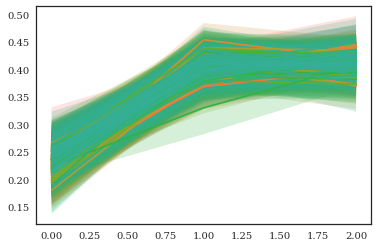

In [106]:
sns.tsplot(sobol_first_indices)

In [66]:
df = stack.to_frame(name='Indice Values')
df.head()

Indice Values
Variables Bootstrap                                
$X_1$     0         Sobol first            0.372690
                    Sobol total            0.267065
                    Sobol first ind        0.330516
                    Sobol total ind        0.350955
                    Sobol first full       0.289197

In [101]:
results.head()

Indice Values
Indices     Variables Bootstrap               
Sobol First $X_1$     0               0.372690
                      1               0.313131
                      2               0.266934
                      3               0.337833
                      4               0.304535

In [100]:
sns.boxplot(data=results, x='Indices', y='Indice Values')

ValueError: Could not interpret input 'Indices'

In [12]:
iterables = [['bar', 'baz', 'foo', 'qux'], ['one', 'two']]
index = pd.MultiIndex.from_product(iterables, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [27]:
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

n_sample = 1000

# Evaluate the model
sobol = SobolIndices(model.input_distribution)
sobol.build_uncorrelated_mc_sample(model, n_sample)

In [28]:
n_boot = 500
estimator = 'sobolmara'
sobol_results_full = sobol.compute_full_indices(n_boot=n_boot, estimator=estimator)
sobol_results_ind = sobol.compute_ind_indices(n_boot=n_boot, estimator=estimator)

# Results
first_indices_full_mc = sobol_results_full.first_indices
total_indices_full_mc = sobol_results_full.total_indices
first_indices_ind_mc = sobol_results_ind.first_indices
total_indices_ind_mc = sobol_results_ind.total_indices

print("Full Sobol indices:", first_indices_full_mc)
print("Full Total Sobol indices:", first_indices_full_mc)
print("Ind Sobol indices:", first_indices_ind_mc)
print("Ind Total Sobol indices:", first_indices_ind_mc)

Full Sobol indices: [ 0.46137281  0.10838053  0.10633031]
Full Total Sobol indices: [ 0.46137281  0.10838053  0.10633031]
Ind Sobol indices: [ 0.51340032  0.3927304   0.4029347 ]
Ind Total Sobol indices: [ 0.51340032  0.3927304   0.4029347 ]


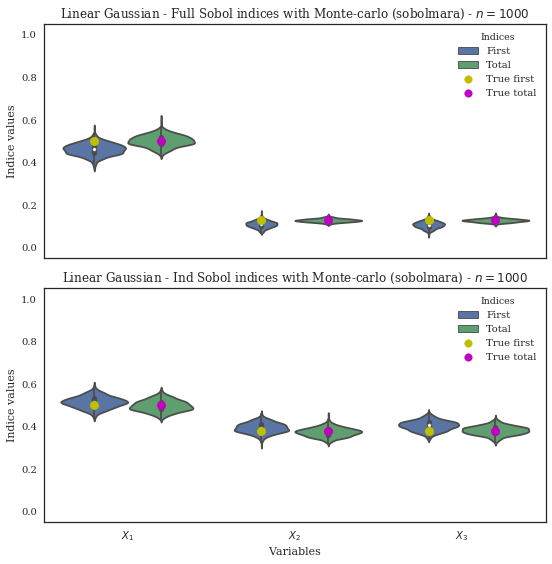

In [29]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8, 8))
ax = axes[0]

sobol_results_full.true_first_indices = true_full_indices
sobol_results_full.true_total_indices = true_full_indices

plot_sensitivity_results(sobol_results_full, ax=ax)
ax.set_title("Linear Gaussian - Full Sobol indices with Monte-carlo (%s) - $n=%d$" % (estimator, n_sample))
ax.set_ylim(ylim)
ax.set_xlabel('')
    
ax = axes[1]
sobol_results_ind.true_first_indices = true_ind_indices
sobol_results_ind.true_total_indices = true_ind_indices

plot_sensitivity_results(sobol_results_ind, ax=ax)
ax.set_title("Linear Gaussian - Ind Sobol indices with Monte-carlo (%s) - $n=%d$" % (estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()
if savefigs:
    fig.savefig('./output/gaussian_dep_full_ind_theta_%d_n_%d_%s.pdf' % (id_theta, n_sample, estimator))